In [250]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import Word,TextBlob
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from PIL import Image
import scipy as cp

In [5]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
!pip install xgboost
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [157]:
df=pd.read_csv("restaurant.csv")

In [158]:
import pandas_profiling
df.profile_report()

In [7]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="output.html")

In [159]:
df.shape

(10417, 10)

In [160]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [161]:
df.stars.value_counts(normalize=True)

5    0.407699
4    0.253048
3    0.149851
1    0.101373
2    0.088029
Name: stars, dtype: float64

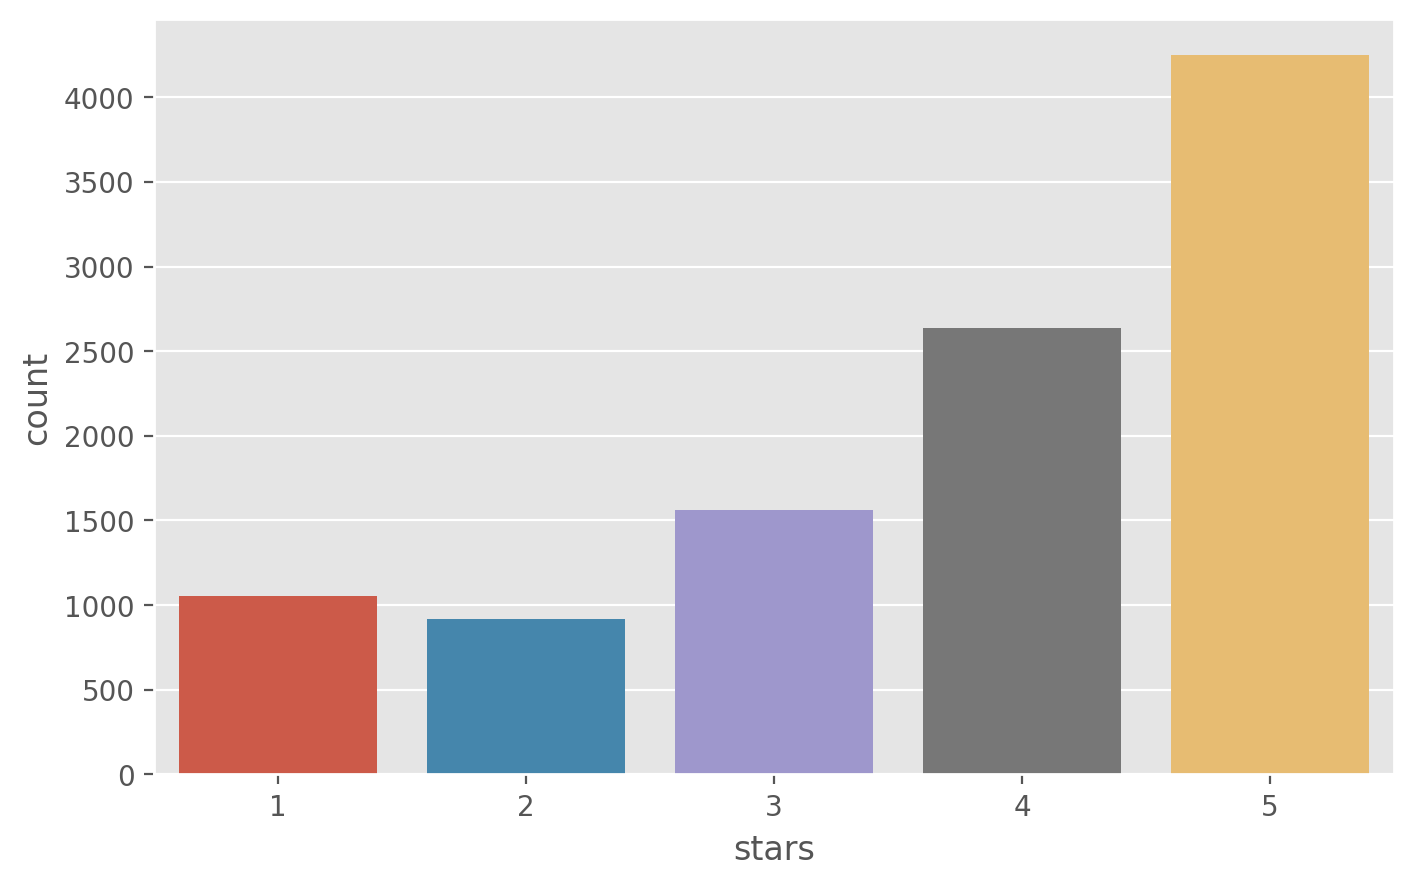

In [162]:
plt.style.use("ggplot")
plt.figure(figsize=(8,5),dpi=200)
sns.countplot(df.stars);

In [163]:
df["year"]=pd.DatetimeIndex(df["date"]).year

In [164]:
df.sample()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
1113,2455408,6Zw1FlhTy9xc-KaxGJyYlg,wKLMRT9C-jkCpzonQz7WPg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I'm not sure if they have seafood only on the ...,2015-11-20 15:13:10,2015


In [165]:
df2=pd.DataFrame(df.groupby("year").stars.mean())

In [166]:
df2

,stars
year,
2012,3.899297
2013,3.930833
2014,3.809704
2015,3.870331
2016,3.613703
2017,3.685768
2018,3.714286
2019,3.807715


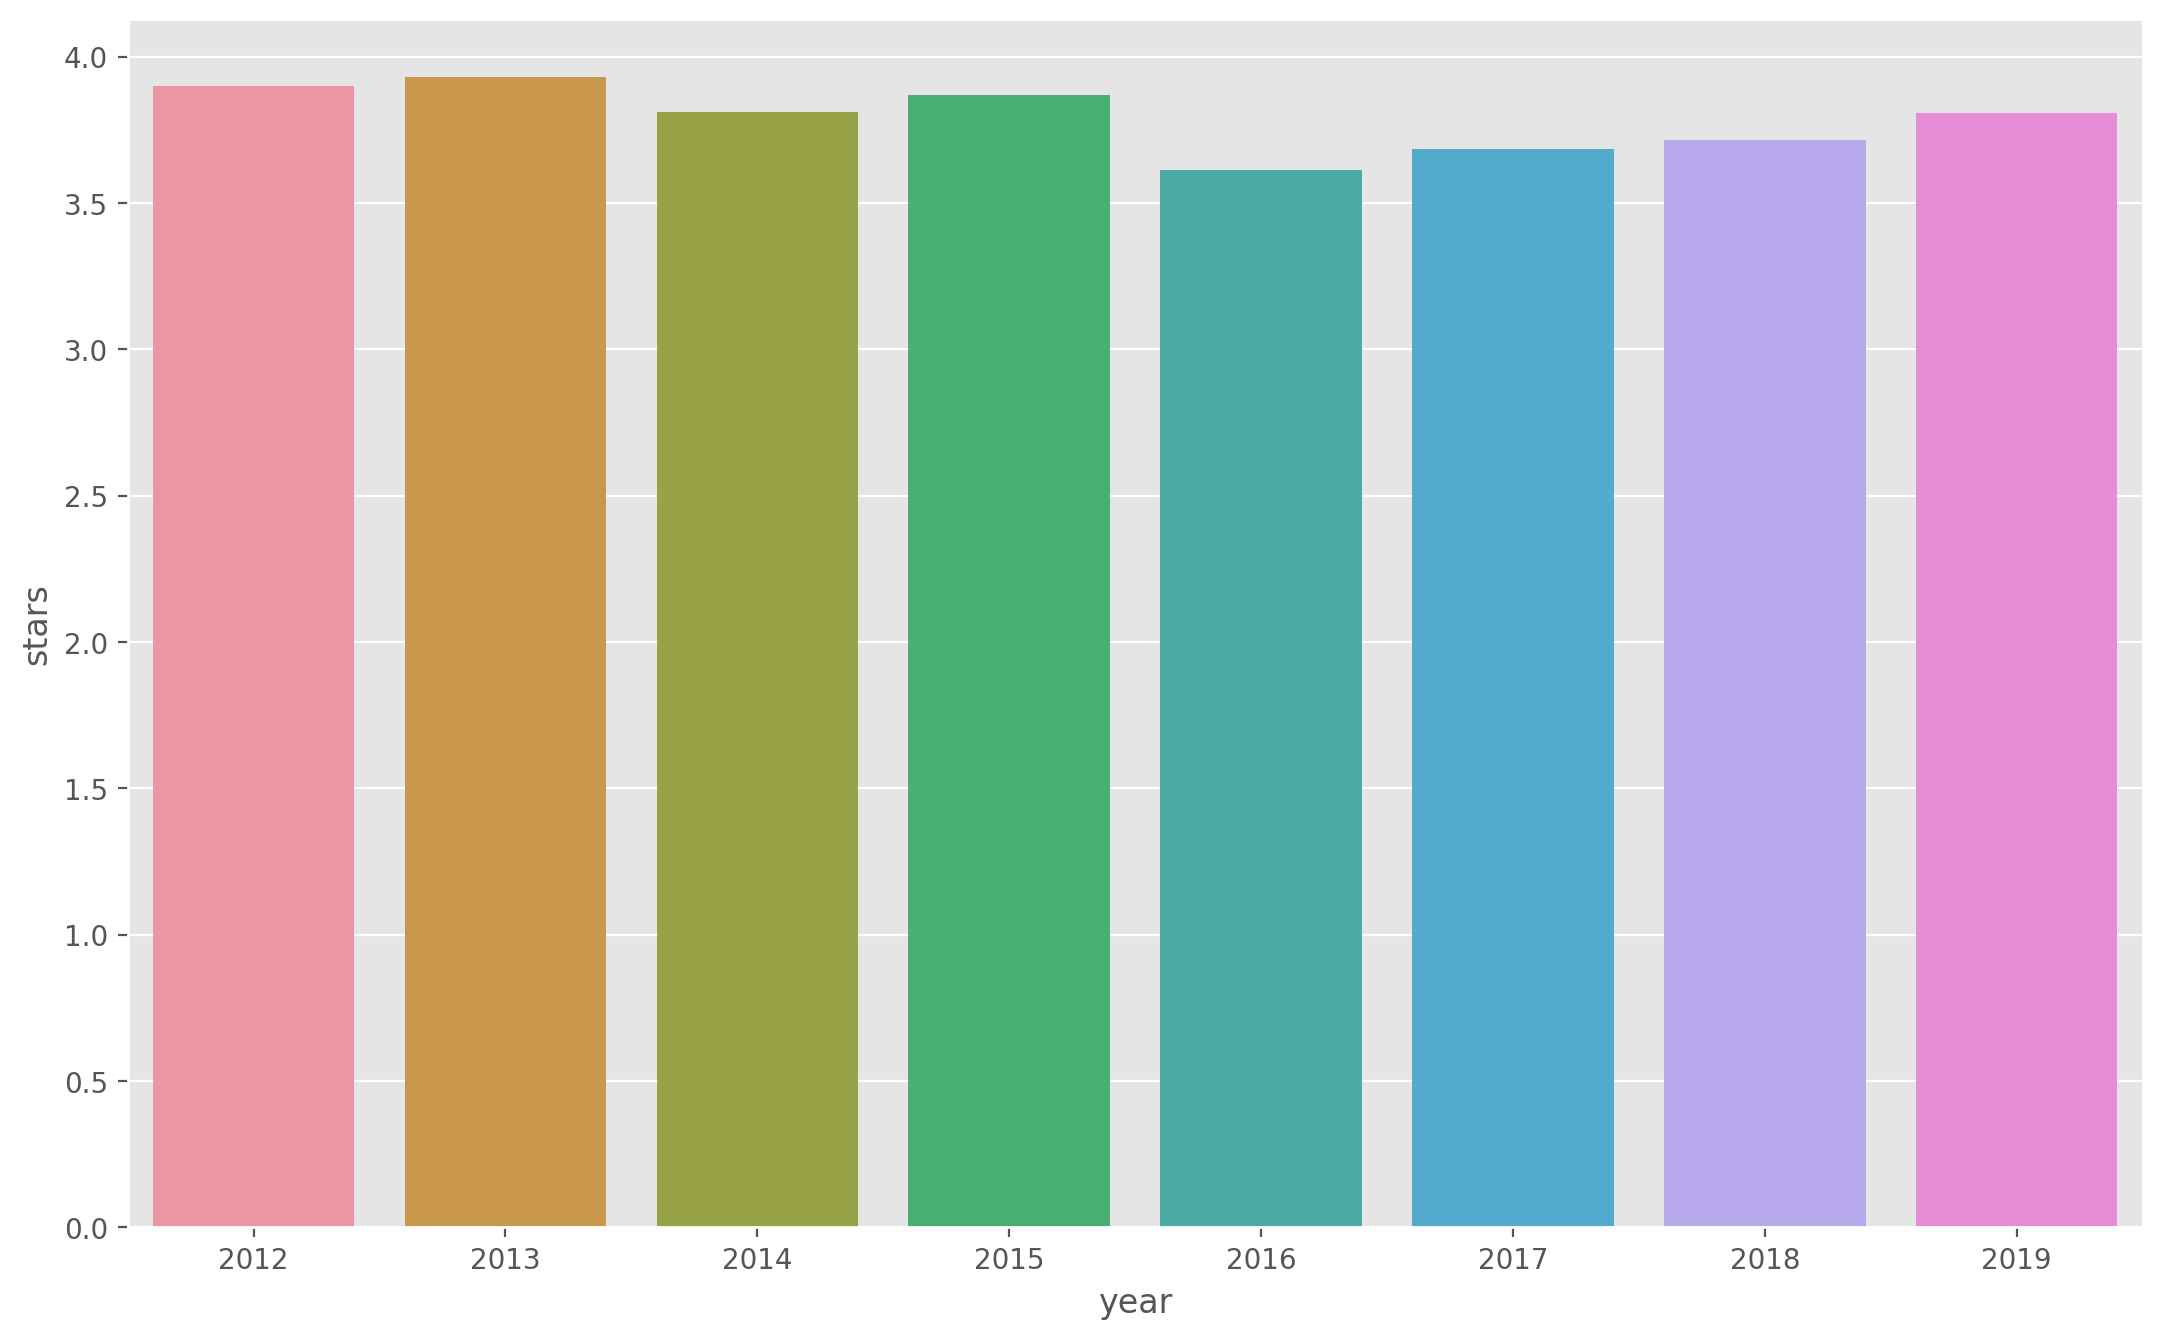

In [167]:
plt.style.use("ggplot")
plt.figure(figsize=(13,8),dpi=200)
sns.barplot(df2.index,df2.stars,data=df2);

In [168]:
df["sentiment"]=df.stars.map({3:"neutral",1:"negative",2:"negative",4:"positive",5:"positive"})

In [169]:
df.sample(7)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,sentiment
1160,2459547,uxV3LOgp7atSmLvHCa6hrw,INPppZR6jwq_oR5u88ObuA,RESDUcs7fIiihp38-d6_6g,4,1,0,0,This is a nice buffet inside Caeser's Palace a...,2016-10-15 05:57:50,2016,positive
722,2426045,lXN2mnB-qE0MVE5O0IMAAQ,QptpcxYp9lAmar-kdXb4wg,RESDUcs7fIiihp38-d6_6g,4,0,0,0,After 17 million spend this is the #1 buffet i...,2013-10-04 20:11:38,2013,positive
3326,2620723,fxIuMzQE04w9NZS6ktCEBQ,_VMGbmIeK71rQGwOBWt_Kg,RESDUcs7fIiihp38-d6_6g,5,9,2,5,"A month after the grand opening Elite event, I...",2012-10-23 01:52:53,2012,positive
9147,3104785,nKMCTNYGwrZi1ivWi17k0A,WccUJ61Pr2np_3m2iAcwLg,RESDUcs7fIiihp38-d6_6g,5,4,0,2,Alright guys- this was crazy expensive $125 fo...,2017-08-27 01:58:19,2017,positive
3912,2664287,oO9RaHuzbICXBtaiBHfwCQ,H1CdMqE-6Rqt2e8XCoq-Zg,RESDUcs7fIiihp38-d6_6g,1,0,0,0,You shouldn't trust stupid kiosk. I went to th...,2015-12-28 04:59:32,2015,negative
2164,2532956,J2d3XIDZK7k6Qu7SohD67Q,u611v_Jw7PiwY_V9CZgVZw,RESDUcs7fIiihp38-d6_6g,4,1,0,2,The food was excellent. Try the fried chicken ...,2017-03-31 16:21:55,2017,positive
5126,2757497,pdiFsInJaaIkmuNStLQVdA,bYyaHM9Dy5bX3uMNJuaNnA,RESDUcs7fIiihp38-d6_6g,5,9,2,4,Bacchanal is the most expensive buffet I've ev...,2013-11-12 14:27:41,2013,positive


In [170]:
df.sentiment.value_counts()

positive    6883
negative    1973
neutral     1561
Name: sentiment, dtype: int64

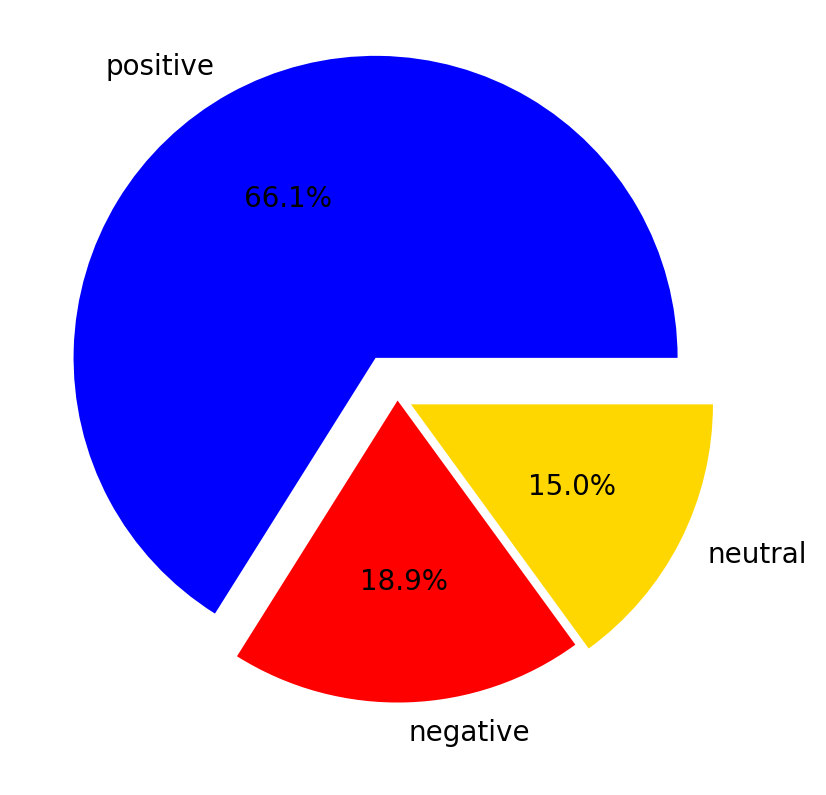

In [171]:
x=df.sentiment.value_counts(normalize=True)
label=["positive","negative","neutral"]
my_color=["blue","red","gold"]
my_explode=[0.15,0.01,0.05]
plt.figure(figsize=(5,5),dpi=200)
plt.pie(x,colors=my_color,labels=label,explode=my_explode,autopct="%1.1f%%");

In [172]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,sentiment
1502,2483224,f8epnISL2Jys5F2pXtXl5A,WynwOoKk7Tnl0Yt1oX3w0w,RESDUcs7fIiihp38-d6_6g,1,0,0,0,The food here might be ok but the entire exper...,2015-07-06 20:19:01,2015,negative
201,2384688,GD3Jw2QHiIVrFzVzM5KJOQ,RPgxx0yCxGXvWx8KKpc1DQ,RESDUcs7fIiihp38-d6_6g,5,5,5,4,Did you ever wonder what food heaven is like? ...,2012-10-08 20:06:46,2012,positive
1932,2516015,zjyViMDh9jTUpsKiaUS_rg,ZEnLnUaEBd2l4K9YaaisOg,RESDUcs7fIiihp38-d6_6g,4,1,0,0,The amount of food I get for 50 dollars is wel...,2013-05-13 19:37:57,2013,positive
6262,2843896,Nj4e8w3rIsCQjYTN-uNsOw,aArQKi1oX3uePkV4kybUsw,RESDUcs7fIiihp38-d6_6g,4,7,2,3,Just get a plate of crab legs and call it a da...,2018-10-25 05:28:19,2018,positive
2784,2580077,61D8jyEY0E9eooxDfOMfTQ,AkuUlIz4bLoTLM-ZNqMl5Q,RESDUcs7fIiihp38-d6_6g,5,0,0,0,My favorite Vegas buffet! (replacing my previo...,2013-09-19 23:44:44,2013,positive


In [173]:
df["text"]=df["text"].str.replace("[^\w\s]"," ").str.lower().str.replace("[\d+]"," ").str.replace("\n","").str.replace("\r","")

In [174]:
from langdetect import detect


In [175]:
df["language"]=df["text"].apply(detect)

In [176]:
df["language"].value_counts()

en       10375
es          10
ko           7
ja           7
zh-cn        6
fr           4
de           4
da           2
pt           1
sk           1
Name: language, dtype: int64

In [177]:
df=df[df["language"]=="en"]#diğer diller sayıca az olduğundan dolayı sadece ingilizce olan textleri kullanacağım.

In [178]:
df.drop(index=df[df["language"]!="en"].index,inplace=True)

In [181]:
df.text.sample(19)

6724    all you can eat  perfectly sliced crab legs wi...
3078    the food is not fresh i got sick after eating ...
6697    we finally get to try bacchanal buffet   thank...
1376    everyone raves about this place and had to try...
8326    i have tried the buffet at the wynn  wicked sp...
9907    i have no idea how you rate it more than one s...
3951    best buffet in town  selection is the largest ...
6803    love this buffet  i always bring my daughter a...
2579    i can t complain about the price as a friend t...
3206    as far as buffets go   this is definitely the ...
5459    buffet value to price at lunch is   stars  wyn...
9507    lines were long at  pm on a thursday night  bu...
7989    the best casino buffet in las vegas  the dishe...
8411    best buffet ever it is pricey but it s worth i...
2310    i came to bacchanal with high expectations sin...
4382    came here the day after christmas for lunch wi...
359     wow wow wow  easily one of the best buffets in...
904     before

In [182]:
df=df[["stars","sentiment","text"]]

In [187]:
df.shape

(10375, 3)

In [188]:
df.sample(5)

,stars,sentiment,text
8604,4,positive,the king of buffets on the strip for sure thi...
3375,3,neutral,if you are a buffet person then this place wi...
1165,2,negative,i am not definitely not a buffet person but t...
7240,3,neutral,yes all the hype about the bacchanal but i thi...
4001,1,negative,way over rated and way over priced the long w...


In [189]:
def woc(data,bgcolor):
    mask=np.array(Image.open("cloud.png"))
    stopwords=set(STOPWORDS)
    wc=WordCloud(background_color=bgcolor,max_words=100,mask=mask,stopwords=stopwords).generate(" ".join(data))#satırlar birleştirilip metin haline etirildi
    plt.figure(figsize=(23,23))
    plt.imshow(wc)
    plt.axis("off")
    

In [190]:
pos=df.query("sentiment=='positive'")["text"]

In [191]:
neg=df.query("sentiment=='negative'")["text"]

In [192]:
neut=df.query("sentiment=='neutral'")["text"]

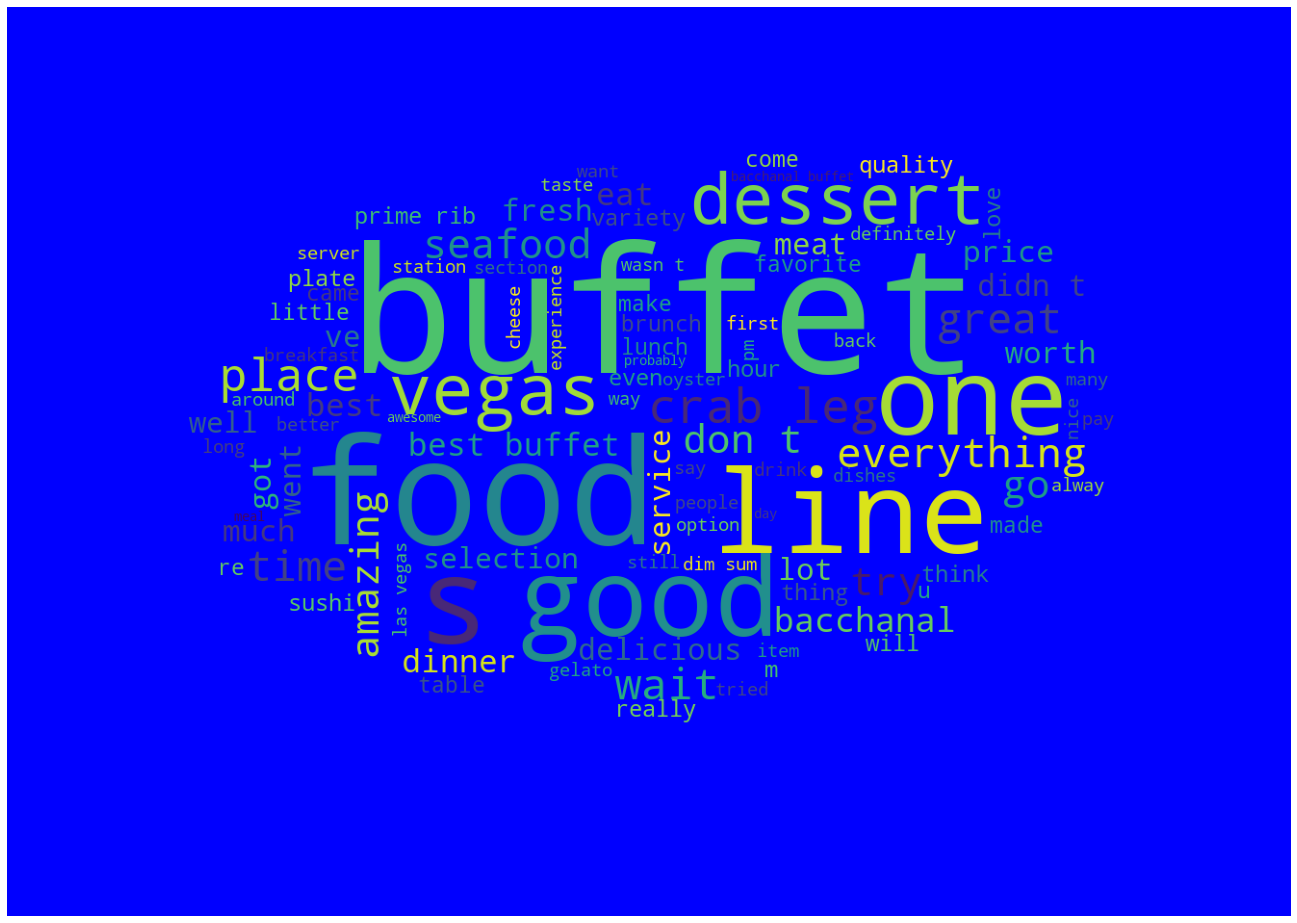

In [193]:
woc(pos,"blue")

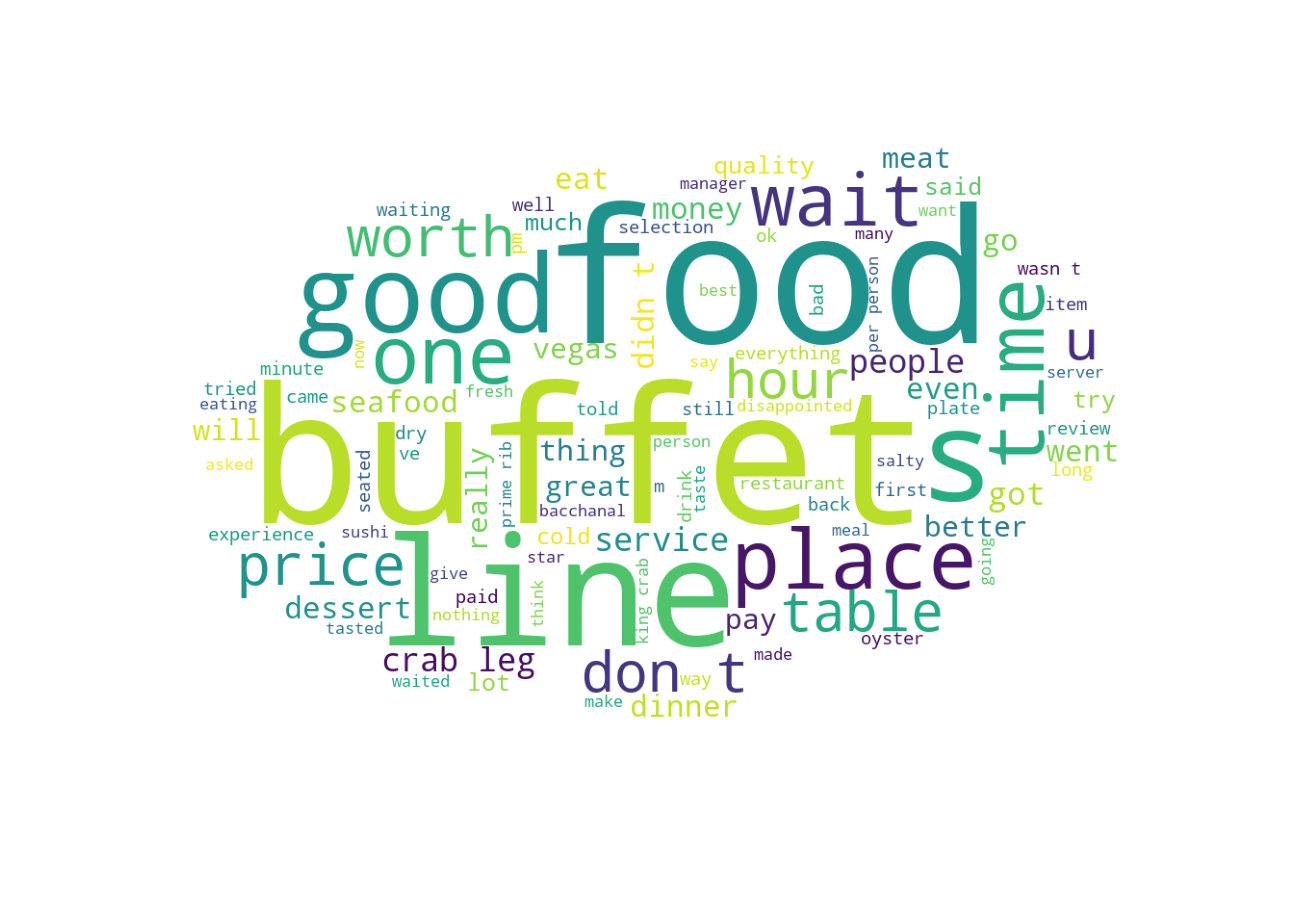

In [194]:
woc(neg,"white")

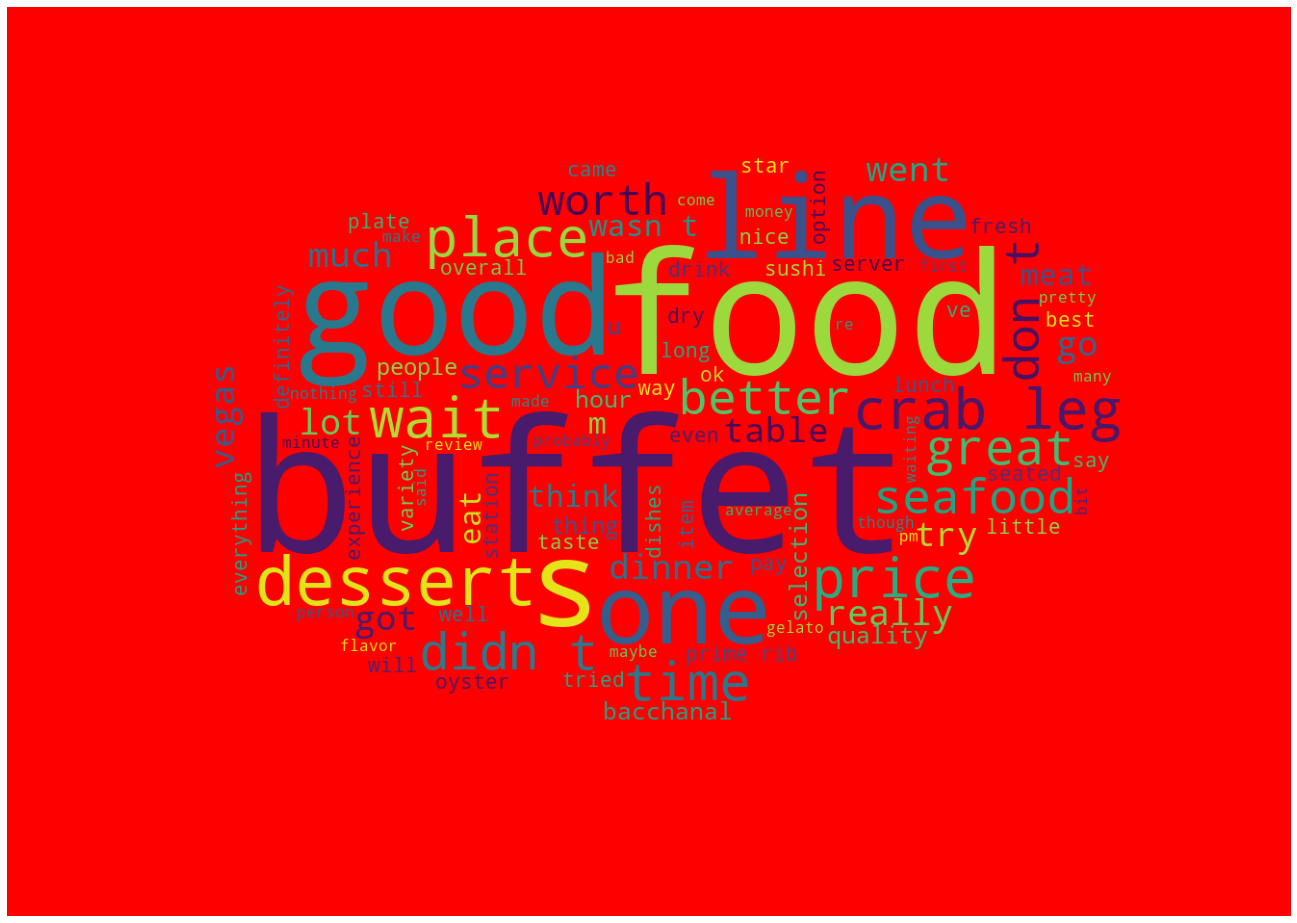

In [195]:
woc(neut,"red")

In [196]:
df.shape

(10375, 3)

In [197]:
df=df[(df["sentiment"]=="positive") | (df["sentiment"]=="negative")]#sadece positive ve negative değerleri almış olduk

In [110]:
#df[["polarity","subjectivity"]]=df["text"].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

In [201]:
df.sample(5)

,stars,sentiment,text
4090,5,positive,by far my favorite buffet on the strip i love...
315,4,positive,you can pay to skip the first line whic...
9425,4,positive,the food is great servers and staff are very ...
675,1,negative,who cares about the price it s vegas baby t...
10248,1,negative,read good things but my experience was terrib...


In [202]:
df.shape

(8818, 3)

In [205]:
df.reset_index(drop=True,inplace=True)#daha önce df üzerinden işlem yaptığımız için daha düzgün çalışsın diye indexi sıfırladık

In [206]:
df.sample(5)

,stars,sentiment,text
5665,4,positive,my friends tell me this is the buffet to try w...
8549,1,negative,expensive buffet for nothing power went out w...
1566,2,negative,a big variety of mediocre food during lunch ...
705,4,positive,wow just wow this buffet is something else i...
310,5,positive,my favorite vegas buffet of all time highligh...


In [207]:
x=df.text
y=df.sentiment

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [211]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6613,), (2205,), (6613,), (2205,))

In [212]:
vect=CountVectorizer(lowercase=True,stop_words="english",)#lowercase le harfleri küçülttük ama aslında gerek yoktu daha önce  küçülttük
#stop_words ile gereksiz kelimeleri atık
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 5454)	3
  (0, 6173)	2
  (0, 12227)	3
  (0, 35)	1
  (0, 15505)	1
  (0, 4150)	1
  (0, 7654)	2
  (0, 15283)	1
  (0, 6681)	1
  (0, 12100)	1
  (0, 3530)	1
  (0, 14727)	1
  (0, 1828)	1
  (0, 8358)	1
  (0, 3667)	1
  (0, 15105)	3
  (0, 10638)	1
  (0, 3424)	2
  (0, 2696)	1
  (0, 15507)	4
  (0, 4932)	1
  (0, 12361)	1
  (0, 4913)	1
  (0, 4414)	1
  (0, 6793)	3
  :	:
  (6611, 10074)	1
  (6611, 10923)	1
  (6611, 6378)	1
  (6612, 4932)	1
  (6612, 9904)	1
  (6612, 12123)	1
  (6612, 14134)	1
  (6612, 689)	1
  (6612, 9782)	1
  (6612, 2702)	1
  (6612, 12224)	1
  (6612, 6756)	1
  (6612, 14035)	1
  (6612, 10281)	1
  (6612, 9866)	1
  (6612, 15454)	1
  (6612, 6158)	1
  (6612, 1659)	1
  (6612, 2547)	1
  (6612, 4139)	1
  (6612, 1033)	1
  (6612, 6889)	1
  (6612, 11499)	1
  (6612, 463)	1
  (6612, 6582)	1


In [213]:
print(x_test)

6218    absolutely amazing    the best buffet i have e...
3945    i don t like buffets   there    i said it   lo...
3063    the line here is ridiculous like crazy long an...
5820    timed this to hit breakfast and lunch  clearly...
1665    this is the only buffet on the strip to challe...
                              ...                        
5143    when you think of buffets  you never think of ...
5586    best buffet i ve been to in vegas  crazy varie...
4604    the best buffet in vegas  nice layout  always ...
6511    sadly i have to update my prior review of this...
5829       stars for the food    star for the    hour ...
Name: text, Length: 2205, dtype: object


In [214]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names()) #vektör haline çevirdk sadece 0 olmayanlar göründü
tf.head()
#15809 farklı kelime kullanılmış

,__,___,____,_____,_________________________bacchanal,_________________________key,_hsnhwaeddb,_really_,_that_,_wb,...,要有排隊的準備,超难吃,距離太遠,跟其他所有菜一樣,跟周圍的亞洲款菜式一樣,跟雪蟹混在一起,過了下午六點後才拿出來,食物的選擇蠻多的,魚香茄子,龍蝦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
#Naive Bayes
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9065759637188209


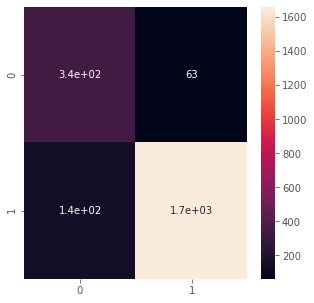

In [216]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_class,y_test), annot=True);

In [217]:
Log=LogisticRegression()
Log.fit(x_train_dtm,y_train)
y_pred_class=Log.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.9256235827664399


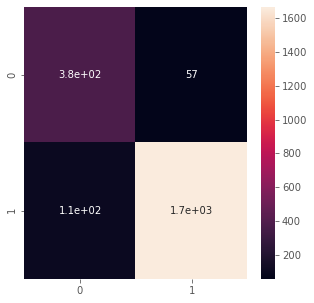

In [218]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_pred_class,y_test), annot=True);

In [219]:
gbc.fit(x_train_dtm,y_train)
y_pred_class=gbc.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8839002267573696


In [220]:
rfc.fit(x_train_dtm,y_train)
y_pred_class=rfc.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8671201814058956


In [221]:
knc.fit(x_train_dtm,y_train)
y_pred_class=knc.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8054421768707483


In [222]:
b.fit(x_train_dtm,y_train)
y_pred_class=b.predict(x_test_dtm)
print(metrics.accuracy_score(y_test,y_pred_class))

0.8789115646258503


In [225]:
from sklearn.pipeline import Pipeline

In [227]:
model=Pipeline([("vectorizer",vect),("classifier",LogisticRegression())])
model.fit(x_train,y_train)
predictions=model.predict(x_test)
confusion_matrix(predictions,y_test)

array([[ 375,   57],
       [ 107, 1666]], dtype=int64)

In [228]:
accuracy_score(predictions,y_test)

0.9256235827664399

In [241]:
example=["very goood"]
result=model.predict(example)
result

array(['positive'], dtype=object)

In [255]:
def tokenize_test(vect):
    x_train_dtm=vect.fit_transform(x_train)
    print("Features: ",x_train_dtm.shape[1])
    x_test_dtm=vect.transform(x_test)
    Log.fit(x_train_dtm,y_train)#1
    y_Log_class=Log.predict(x_test_dtm)
    nb.fit(x_train_dtm,y_train)#2
    y_nb_class=nb.predict(x_test_dtm)
    gbc.fit(x_train_dtm,y_train)#3
    y_gbc_class=gbc.predict(x_test_dtm)
    rfc.fit(x_train_dtm,y_train)#4
    y_rfc_class=rfc.predict(x_test_dtm)
    knc.fit(x_train_dtm,y_train)#5
    y_knc_class=knc.predict(x_test_dtm)
    b.fit(x_train_dtm,y_train)#6
    y_b_class=b.predict(x_test_dtm)
    print("Accuracy_logisticregression: ",metrics.accuracy_score(y_test,y_Log_class))
    print("Accuracy_NaiveBayes: ",metrics.accuracy_score(y_test,y_nb_class))
    print("Accuracy_GradientBoostingClassifier: ",metrics.accuracy_score(y_test,y_gbc_class))
    print("Accuracy_RandomForestClassifier: ",metrics.accuracy_score(y_test,y_rfc_class))
    print("Accuracy_KNeighborsClassifier: ",metrics.accuracy_score(y_test,y_knc_class))
    print("Accuracy_BernoulliNB: ",metrics.accuracy_score(y_test,y_b_class))

In [256]:
vect=CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features:  229437
Accuracy_logisticregression:  0.945124716553288
Accuracy_NaiveBayes:  0.873922902494331
Accuracy_GradientBoostingClassifier:  0.9065759637188209
Accuracy_RandomForestClassifier:  0.8503401360544217
Accuracy_KNeighborsClassifier:  0.8
Accuracy_BernoulliNB:  0.8126984126984127


In [ ]:
#ngram_range kullanarak daha iyi bir tahmin yapacağını gördük


In [257]:
vect=CountVectorizer(ngram_range=(1,2),min_df=2)
tokenize_test(vect)

Features:  75712
Accuracy_logisticregression:  0.946031746031746
Accuracy_NaiveBayes:  0.9306122448979591
Accuracy_GradientBoostingClassifier:  0.9061224489795918
Accuracy_RandomForestClassifier:  0.8689342403628117
Accuracy_KNeighborsClassifier:  0.8013605442176871
Accuracy_BernoulliNB:  0.873015873015873


In [ ]:
#kelimenin en az 2 kez kullanılmasına bakılarak da doğruluk oranının yakın bir değer çıktığını gördük.Hatta bazı algoritmalarda daha fazla arttığını gördük

In [258]:
stemmer=SnowballStemmer("english")

In [259]:
def split_into_lemmas(text):
    text=str(text).lower()
    words=TextBlob(text).words
    return [stemmer.stem(word) for word in words]
#return [word.lemmatize() for word in words]

In [260]:
vect=CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  11300
Accuracy_logisticregression:  0.9342403628117913
Accuracy_NaiveBayes:  0.9111111111111111
Accuracy_GradientBoostingClassifier:  0.9006802721088435
Accuracy_RandomForestClassifier:  0.853514739229025
Accuracy_KNeighborsClassifier:  0.8108843537414966
Accuracy_BernoulliNB:  0.8843537414965986


In [ ]:
#köklerine ayırdığımızda accuracy oranları düştü